Small notebook to classify mnist Dataset with neural network


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert it to floating point
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [2]:
model = tf.keras.Sequential([
    #layer to flatten three dimensional input
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #FC layer
    tf.keras.layers.Dense(128, activation='relu'),
    #dropout
    tf.keras.layers.Dropout(0.2),
    #FC layer to classify
    tf.keras.layers.Dense(10)
])

In [4]:
preds = model(x_train[:1]).numpy()
preds

array([[-0.73012614,  0.04617512,  0.7033521 , -0.7608076 , -0.18334666,
         0.4309046 , -0.38078794, -0.6982647 , -0.12776268,  0.71961224]],
      dtype=float32)

In [7]:
# convert logits to "probas" with softmax for better interpretability
# better to NOT apply this to the NN directly, because loss calculation will not be exact and stable anymore
tf.nn.softmax(preds).numpy()

array([[0.04587935, 0.09971502, 0.192384  , 0.04449308, 0.07926484,
        0.146503  , 0.06506282, 0.04736467, 0.08379544, 0.19553776]],
      dtype=float32)

In [10]:
#calculate loss manually, use logits (preds)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], preds).numpy()

1.9207094

In [12]:
#compile the model
model.compile(optimizer='adam',
             loss = loss_fn,
             metrics =['accuracy'])

In [15]:
#train the model
# you can catch history object to plot graph later on
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 3s 54us/sample - loss: 0.0435 - accuracy: 0.9853 - val_loss: 0.0221 - val_accuracy: 0.9933
Epoch 2/5
54000/54000 [==============================] - 3s 50us/sample - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0251 - val_accuracy: 0.9935
Epoch 3/5
54000/54000 [==============================] - 3s 51us/sample - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 4/5
54000/54000 [==============================] - 3s 50us/sample - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 5/5
54000/54000 [==============================] - 3s 50us/sample - loss: 0.0333 - accuracy: 0.9885 - val_loss: 0.0256 - val_accuracy: 0.9923


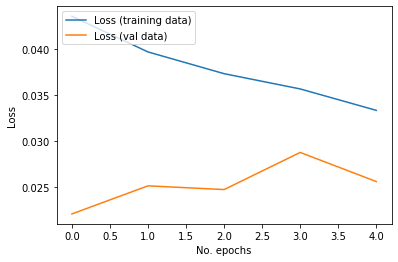

In [18]:
#plot the history
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label = 'Loss (val data)')
plt.ylabel('Loss')
plt.xlabel('No. epochs')
plt.legend(loc='upper left')
plt.show()

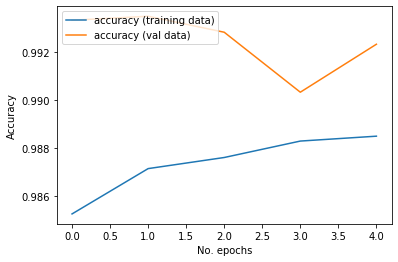

In [19]:
#plot the history
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label = 'accuracy (val data)')
plt.ylabel('Accuracy')
plt.xlabel('No. epochs')
plt.legend(loc='upper left')
plt.show()

In [20]:
# evaluate training with test set
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.0743 - accuracy: 0.9801


[0.0743101847272308, 0.9801]

In [21]:
#otherwise, if probability is needed
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

prob_model([x_test[:5]])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.8321882e-10, 2.8358696e-11, 1.1823841e-07, 2.7381986e-07,
        2.6526983e-16, 2.5781544e-09, 4.7176059e-19, 9.9999964e-01,
        1.6328021e-10, 3.0277445e-08],
       [8.9056346e-14, 7.7269720e-09, 1.0000000e+00, 4.3412600e-11,
        8.2514541e-23, 3.8076910e-11, 7.3030236e-12, 2.4648555e-24,
        7.1414695e-13, 1.2088666e-20],
       [3.7783308e-11, 9.9998415e-01, 3.8947306e-07, 9.3270813e-09,
        5.7164982e-07, 1.0228425e-09, 2.5555860e-07, 6.8164472e-06,
        7.8405064e-06, 2.8617456e-10],
       [9.9981397e-01, 2.5692135e-09, 1.7896356e-04, 4.5811843e-09,
        2.9967194e-07, 4.2590691e-06, 2.4886361e-07, 2.1844210e-06,
        3.0647646e-12, 5.3514509e-10],
       [4.4123759e-08, 6.7185688e-15, 4.7072906e-08, 1.1630982e-11,
        9.9979633e-01, 7.6888674e-13, 1.7837135e-06, 5.3714234e-07,
        1.2534793e-09, 2.0116549e-04]], dtype=float32)>